# Hello Aruco

In [2]:
import sys
import os
sys.path.append("/usr/local/OFF")

In [3]:
# assert os.path.exists('./calibration.pkl')

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pyrealsense2 as rs
from PIL import Image
import cv2

from pyzbar.pyzbar import decode

pipeline = rs.pipeline()
config = rs.config()

In [5]:
config.enable_stream(rs.stream.color, 1280, 720, rs.format.bgr8, 30)
profile = pipeline.start(config)

In [7]:
# aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000)
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_1000)
parameters = cv2.aruco.DetectorParameters_create()
parameters.aprilTagMinClusterPixels = 1
parameters.aprilTagCriticalRad = 0

In [8]:
frames = pipeline.wait_for_frames()
frames

<pyrealsense2.frameset BGR8 #159 @1689265509430.153076>

In [9]:
frame = frames[0]
color_image = np.asanyarray(frame.get_data())
color_image = color_image[...,::-1].copy()

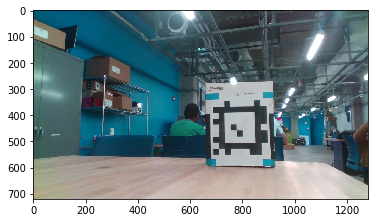

In [10]:
plt.imshow(color_image)
plt.show()

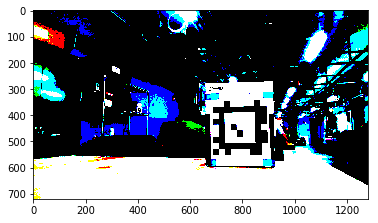

In [11]:
binary_frame = cv2.threshold(color_image,127,255,cv2.THRESH_BINARY)[1]
plt.imshow(binary_frame)
plt.show()

In [12]:
decode(color_image)

[]

In [13]:
accepted, ids, rejected = cv2.aruco.detectMarkers(color_image, aruco_dict, parameters=parameters)
accepted, ids, rejected

((),
 None,
 (array([[[848., 384.],
          [854., 509.],
          [730., 509.],
          [729., 385.]]], dtype=float32),
  array([[[310., 329.],
          [339., 333.],
          [332., 373.],
          [312., 367.]]], dtype=float32),
  array([[[1198.,  206.],
          [1153.,  249.],
          [1124.,  247.],
          [1124.,  210.]]], dtype=float32)))

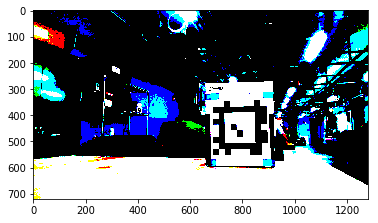

In [14]:
good_frame = cv2.aruco.drawDetectedMarkers(image=binary_frame, ids=ids, corners=accepted)

plt.imshow(good_frame)
plt.show()

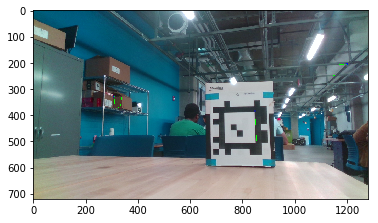

In [15]:
bad_frame = cv2.aruco.drawDetectedMarkers(image=color_image, corners=rejected)

plt.imshow(bad_frame)
plt.show()

In [16]:
im = Image.fromarray(good_frame)
im.save('test.jpg')